# Задача 4. 6 баллов. #

Используя открытые источники и наборы данных решить задачу классификации намерений пользователя. В качестве входных данных поступают реплики пользователя (на русском языке), которые необходимо отнести к одному из классов. Код должен быть организован в соответствиями с требованиями архитектуры, используя ООП парадигму. Библиотека реализации на усмотрение соискателя. 

Дополнением будет реализация поиска «слотов» в рамках интента или реализация механизма их извлечения. 

https://www.kaggle.com/datasets/maxim9012/goods-comments/settings

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
import pickle as p
import pandas as pd
import numpy as np
import seaborn as sns
from string import punctuation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer as token
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import xgboost

In [14]:
class Tokenizer():
    TOP_K = 20000

    MAX_SEQUENCE_LENGTH = 33

    def __init__(self, train_texts):
        self.train_texts = train_texts
        self.tokenizer = token(num_words=self.TOP_K)

    def train_tokenize(self):
        max_length = len(max(self.train_texts, key=len))
        self.max_length = min(max_length, self.MAX_SEQUENCE_LENGTH)
        self.tokenizer.fit_on_texts(self.train_texts)

    def vectorize_input(self, tweets):
        tweets = self.tokenizer.texts_to_sequences(tweets)
        tweets = pad_sequences(tweets, maxlen=self.max_length, truncating='post', padding='post')
        return tweets

In [5]:
df = pd.read_csv('Data (2).csv')

In [6]:
df

,Unnamed: 0,ID отзыва,Дата,Номенклатура,Количество звезд,Бренд,Текст отзыва,Имя,Регион,Цвет,Размер,Полезность (количество минусов),Полезность (количество плюсов),Полезность,cleaned_tweets
0,0,4,6/11/2021,Артикул 4,5,Бренд 4,"Полный комплект, ниток достаточно, много остал...",Ирина,RU,NaN,0,0,0,0,полный комплект нитка достаточно оставаться вы...
1,1,7,6/11/2021,Артикул 7,5,Бренд 6,"Очень понравился набор! Бисер качественный, ос...",Наталья,RU,белый,0,0,0,0,очень понравиться набор бисер качественный ост...
2,2,8,6/11/2021,Артикул 8,5,Бренд 6,Очень красиво получилось,Наталья,RU,синий,0,0,0,0,очень красиво получаться
3,3,21,5/11/2021,Артикул 21,5,Бренд 2,"Набор полный, целый, восхитительный! Открываеш...",Маргарита,RU,белый,0,0,0,0,набор полный целый восхитительный открывать ко...
4,4,23,5/11/2021,Артикул 23,5,Бренд 14,"Заказывала серый сероголубой, пришел синий ва...",Ирина,RU,"серо-голубой, голубой",0,0,0,0,заказывать серый сероголубой приходить синий в...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,3920,9993,5/8/2020,Артикул 3108,5,Бренд 10,"Цвет не серо -голубой,а ближе к серо -зеленому .",Ирина,RU,серо-голубой,0,1,1,1,цвет серо голубой близко серо зеленый
3921,3921,9994,5/8/2020,Артикул 475,5,Бренд 53,Пришел быстро. Не вскрытый. Брала за 1192 рубл...,Наталья,RU,горчичный,0,1,1,1,приходить быстро вскрывать брать рубль дешевы...
3922,3922,9995,5/8/2020,Артикул 3388,5,Бренд 10,"Цвет немного отличается, больше с фиолетовым о...",Инна,RU,пурпурный,0,0,1,1,цвет немного отличаться фиолетовый оттенок плю...
3923,3923,9998,4/8/2020,Артикул 879,5,Бренд 8,Класс очень красиво,Елена,RU,белый,0,0,0,0,класс очень красиво


In [7]:
df
y = df['Полезность']

C:\Users\maxim\AppData\Local\Temp\ipykernel_13244\56026706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=[green, red])
C:\Users\maxim\AppData\Local\Temp\ipykernel_13244\56026706.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=y, palette=[green, red])


<Axes: xlabel='Полезность', ylabel='count'>

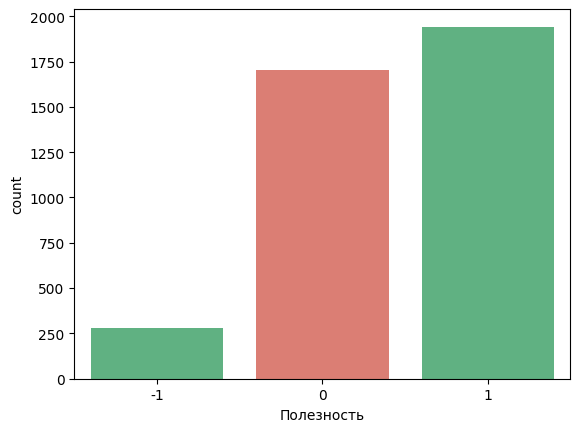

In [10]:
green = '#52BE80'
red = '#EC7063'
sns.countplot(x=y, palette=[green, red])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (2747, 15)
Shape of Validation  (1178, 15)


In [12]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [15]:
tokenizer = Tokenizer(train_texts=X_train['cleaned_tweets'])
tokenizer.train_tokenize()
tokenized_X_train = tokenizer.vectorize_input(X_train['cleaned_tweets'])
tokenized_X_test = tokenizer.vectorize_input(X_test['cleaned_tweets'])

In [16]:
tokenized_X_train

array([[ 80,  89, 903, ...,   0,   0,   0],
       [785,   1,   6, ...,   0,   0,   0],
       [  1,   6,   2, ...,   0,   0,   0],
       ...,
       [ 17,  63,   5, ...,   0,   0,   0],
       [ 32,  32,  32, ...,   0,   0,   0],
       [100,   4,   0, ...,   0,   0,   0]])

In [17]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=700)

In [18]:
rfc.fit(tokenized_X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=700)

In [19]:
y_predrfc = rfc.predict(tokenized_X_test)

In [20]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_predrfc)))

Model accuracy score : 0.5603


In [21]:
tokenizerfilename = 'RFCencoder.pickle'
filemodelname = 'RFCmodel.pickle'

with open(
    tokenizerfilename, 'wb') as handle:
    p.dump(tokenizer, handle, protocol=p.HIGHEST_PROTOCOL)

with open(filemodelname, 'wb') as handle:
    p.dump(rfc, handle, protocol=p.HIGHEST_PROTOCOL)